Lead Scoring Case Study
X-Education is an education company sells online Education courses to professionals and marketing through online advertisements. Company gets information through different channels and if candidates enquring with certain education level it calls lead. Typically lead conversion is 30% of certain education. Company identifying Hot Leads on certain criteria also. Lead conversion ratio is lesser than number of enrollment. comapny given Target to achieve 80% of total enrollment

Goals of the CaStudy- 

dy
Building logistics regression model to finding leads for Company and help to achieve potential targ A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
ets.
Alternative approach should be ready in case Company's requirement changes in futures should be flexible.

In [1]:
#Surpress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import data
data = pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
data.shape

(9240, 37)

DATA CLEANING

In [7]:
# checking for null values
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# Finding column names in which 'Select' level is available:-
cols=list(data.columns)
for i in cols:
    if 'Select' in data[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


In [9]:
# Converting 'Select' values to NaN.
#customer did not select any option from the list, hence it shows 'Select'.
#'Select' values are as good as NULL. So we can convert these values to null values.
data = data.replace('Select', np.nan)

In [10]:
# Checking if there are columns with one unique value since it won't affect our analysis
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
# Dropping unique valued columns
data1= data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Country','City'],axis=1)

In [12]:
(data1.isnull().sum() / len(data)) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

In [13]:
#dropping the columns that are no required and have 35% null values

data2 = data1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','Lead Number','What matters most to you in choosing a course','Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations'],axis=1)
data2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,No,Modified


In [14]:
(data2.isnull().sum() / len(data)) * 100

Prospect ID                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            36.580087
What is your current occupation           29.112554
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [15]:
data2['Specialization'] = data2['Specialization'].fillna('Unknown') 
data2['What is your current occupation'] = data2['What is your current occupation'].fillna('Unknown')

In [16]:
data2.info

<bound method DataFrame.info of                                Prospect ID              Lead Origin  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1     2a272436-5132-4136-86fa-dcc88c88f482                      API   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4     3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   
...                                    ...                      ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9  Landing Page Submission   
9236  82a7005b-7196-4d56-95ce-a79f937a158d  Landing Page Submission   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c  Landing Page Submission   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9  Landing Page Submission   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff  Landing Page Submission   

         Lead Source Do Not Email  Converted  TotalVisits  \
0         Olark Chat           No          0          

In [17]:
# Rechecking the percentage of missing values
round(100*(data2.isnull().sum()/len(data2.index)), 2)

Prospect ID                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [18]:
data3 = data2[data2.isnull().sum(axis=1) <1]
(data3.isnull().sum() / len(data)) * 100

Prospect ID                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [19]:
# Removing Id values since they are unique for everyone
d4 = data3.drop('Prospect ID', axis=1)
d4.shape

(9074, 12)

EDA

In [20]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   object 
 

In [21]:
# Calculating conversion rate:-

Converted = (sum(d4['Converted'])/len(d4['Converted'].index))*100
Converted

37.85541106458012

In [22]:
d4.Converted.value_counts()

Converted
0    5639
1    3435
Name: count, dtype: int64

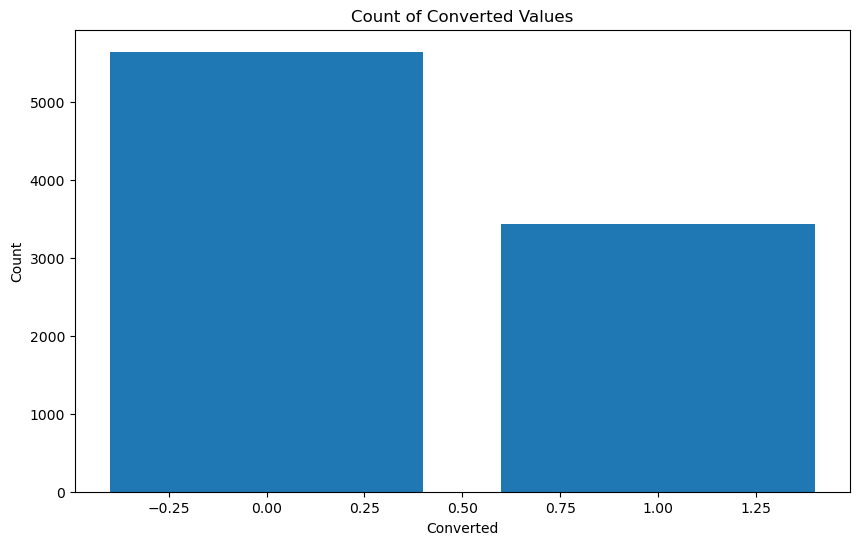

In [23]:
#Plotting count plot to get clear view of data distribution of 'Converted' column:-

converted_counts = d4['Converted'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(converted_counts.index, converted_counts.values)
plt.title('Count of Converted Values')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()


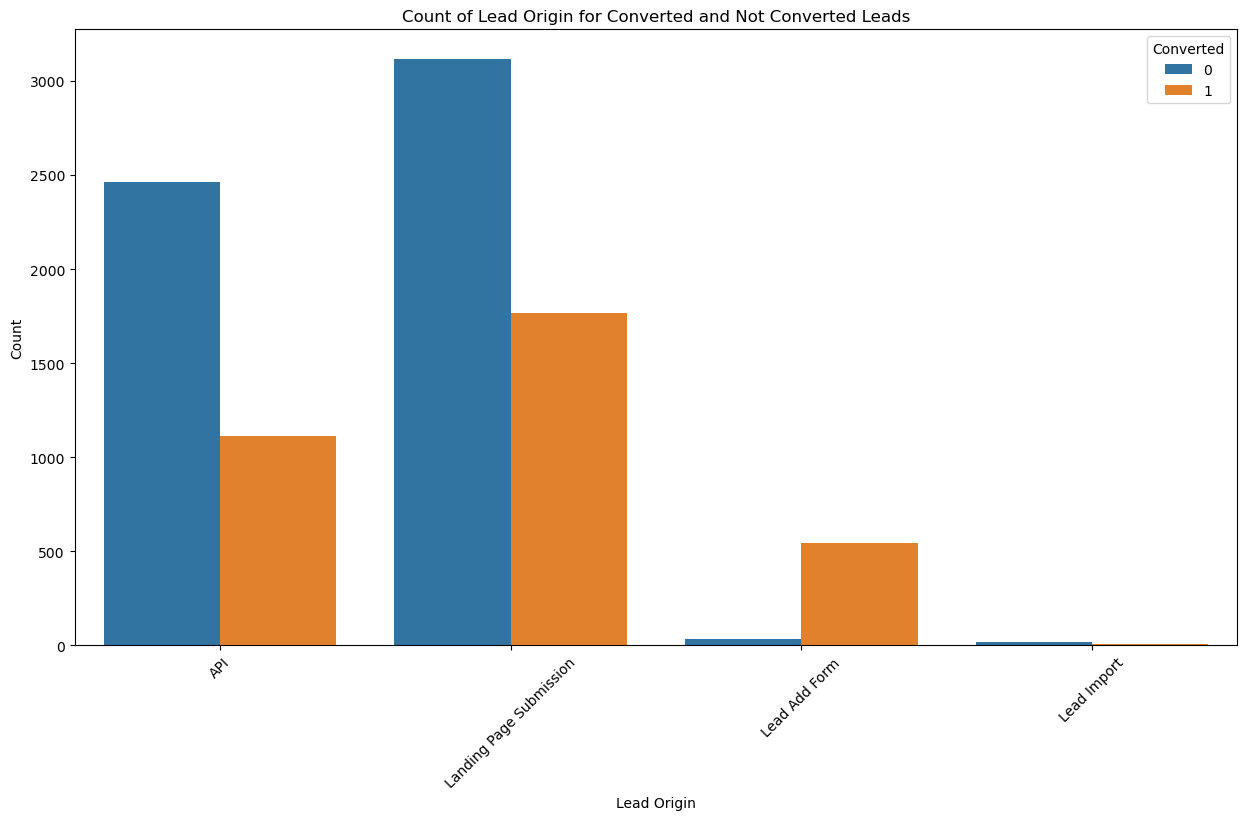

In [24]:
# Plotting count plot of 'Lead Origin' for both 'Converted' 0 and 1 :-
d4['Converted'] = d4['Converted'].astype(str)
plt.figure(figsize=(15, 8))

# Create a count plot for the 'Lead Origin' column with 'Converted' as hue
sns.countplot(x='Lead Origin', hue='Converted', data=d4)

# Set the title and labels
plt.title('Count of Lead Origin for Converted and Not Converted Leads')
plt.xlabel('Lead Origin')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Observation
From above plot we can observe and calculate that :

Conversion rate for 'API' is ~ 31% and for 'Landing Page Submission' is ~36%.
For 'Lead Add Form' number of conversion is more than unsuccessful conversion.
Count of 'Lead Import' is lesser.

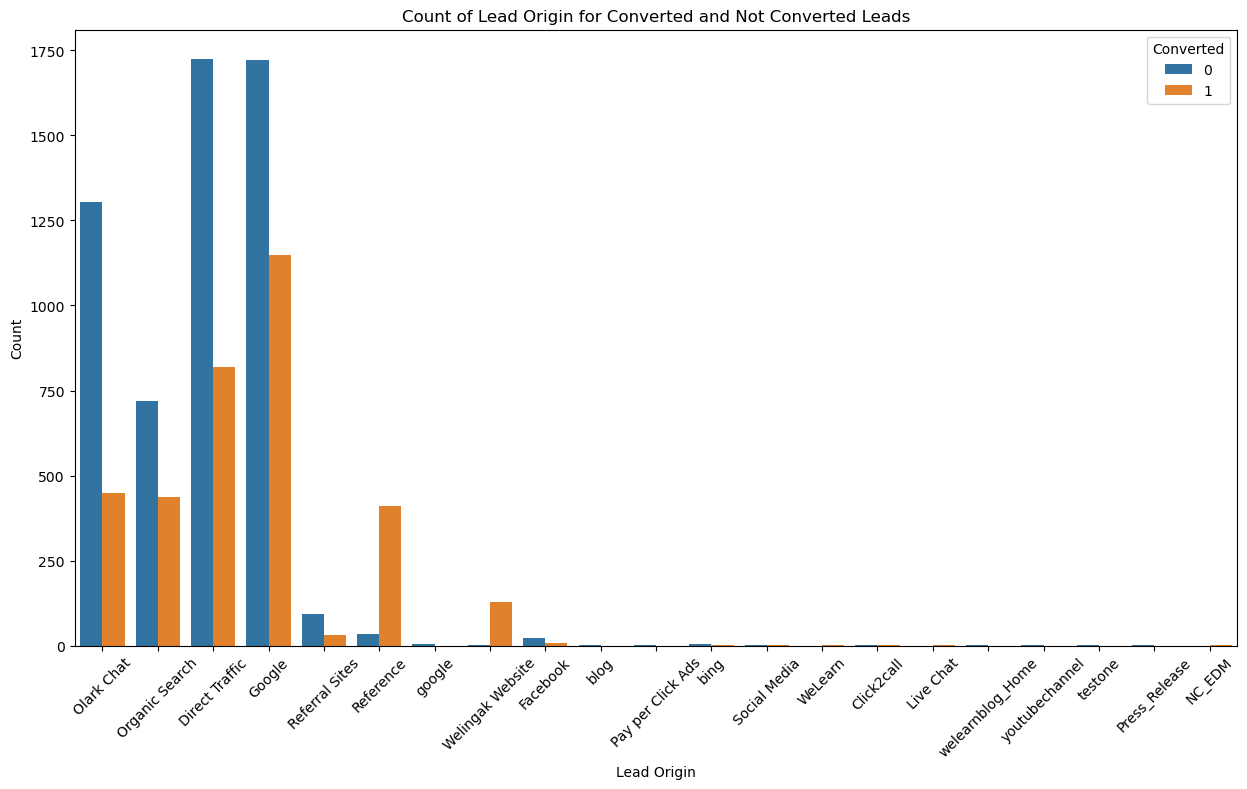

In [25]:
d4['Lead Source'] = d4['Lead Source'].astype(str)
# Plotting count plot of 'Lead Origin' for both 'Converted' 0 and 1
plt.figure(figsize=(15, 8))
sns.countplot(x='Lead Source', hue='Converted', data=d4)

plt.title('Count of Lead Origin for Converted and Not Converted Leads')
plt.xlabel('Lead Origin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Google and Direct traffic generates maximum number of leads.
Conversion rate of 'Reference' and 'Welingak Website' leads is high.

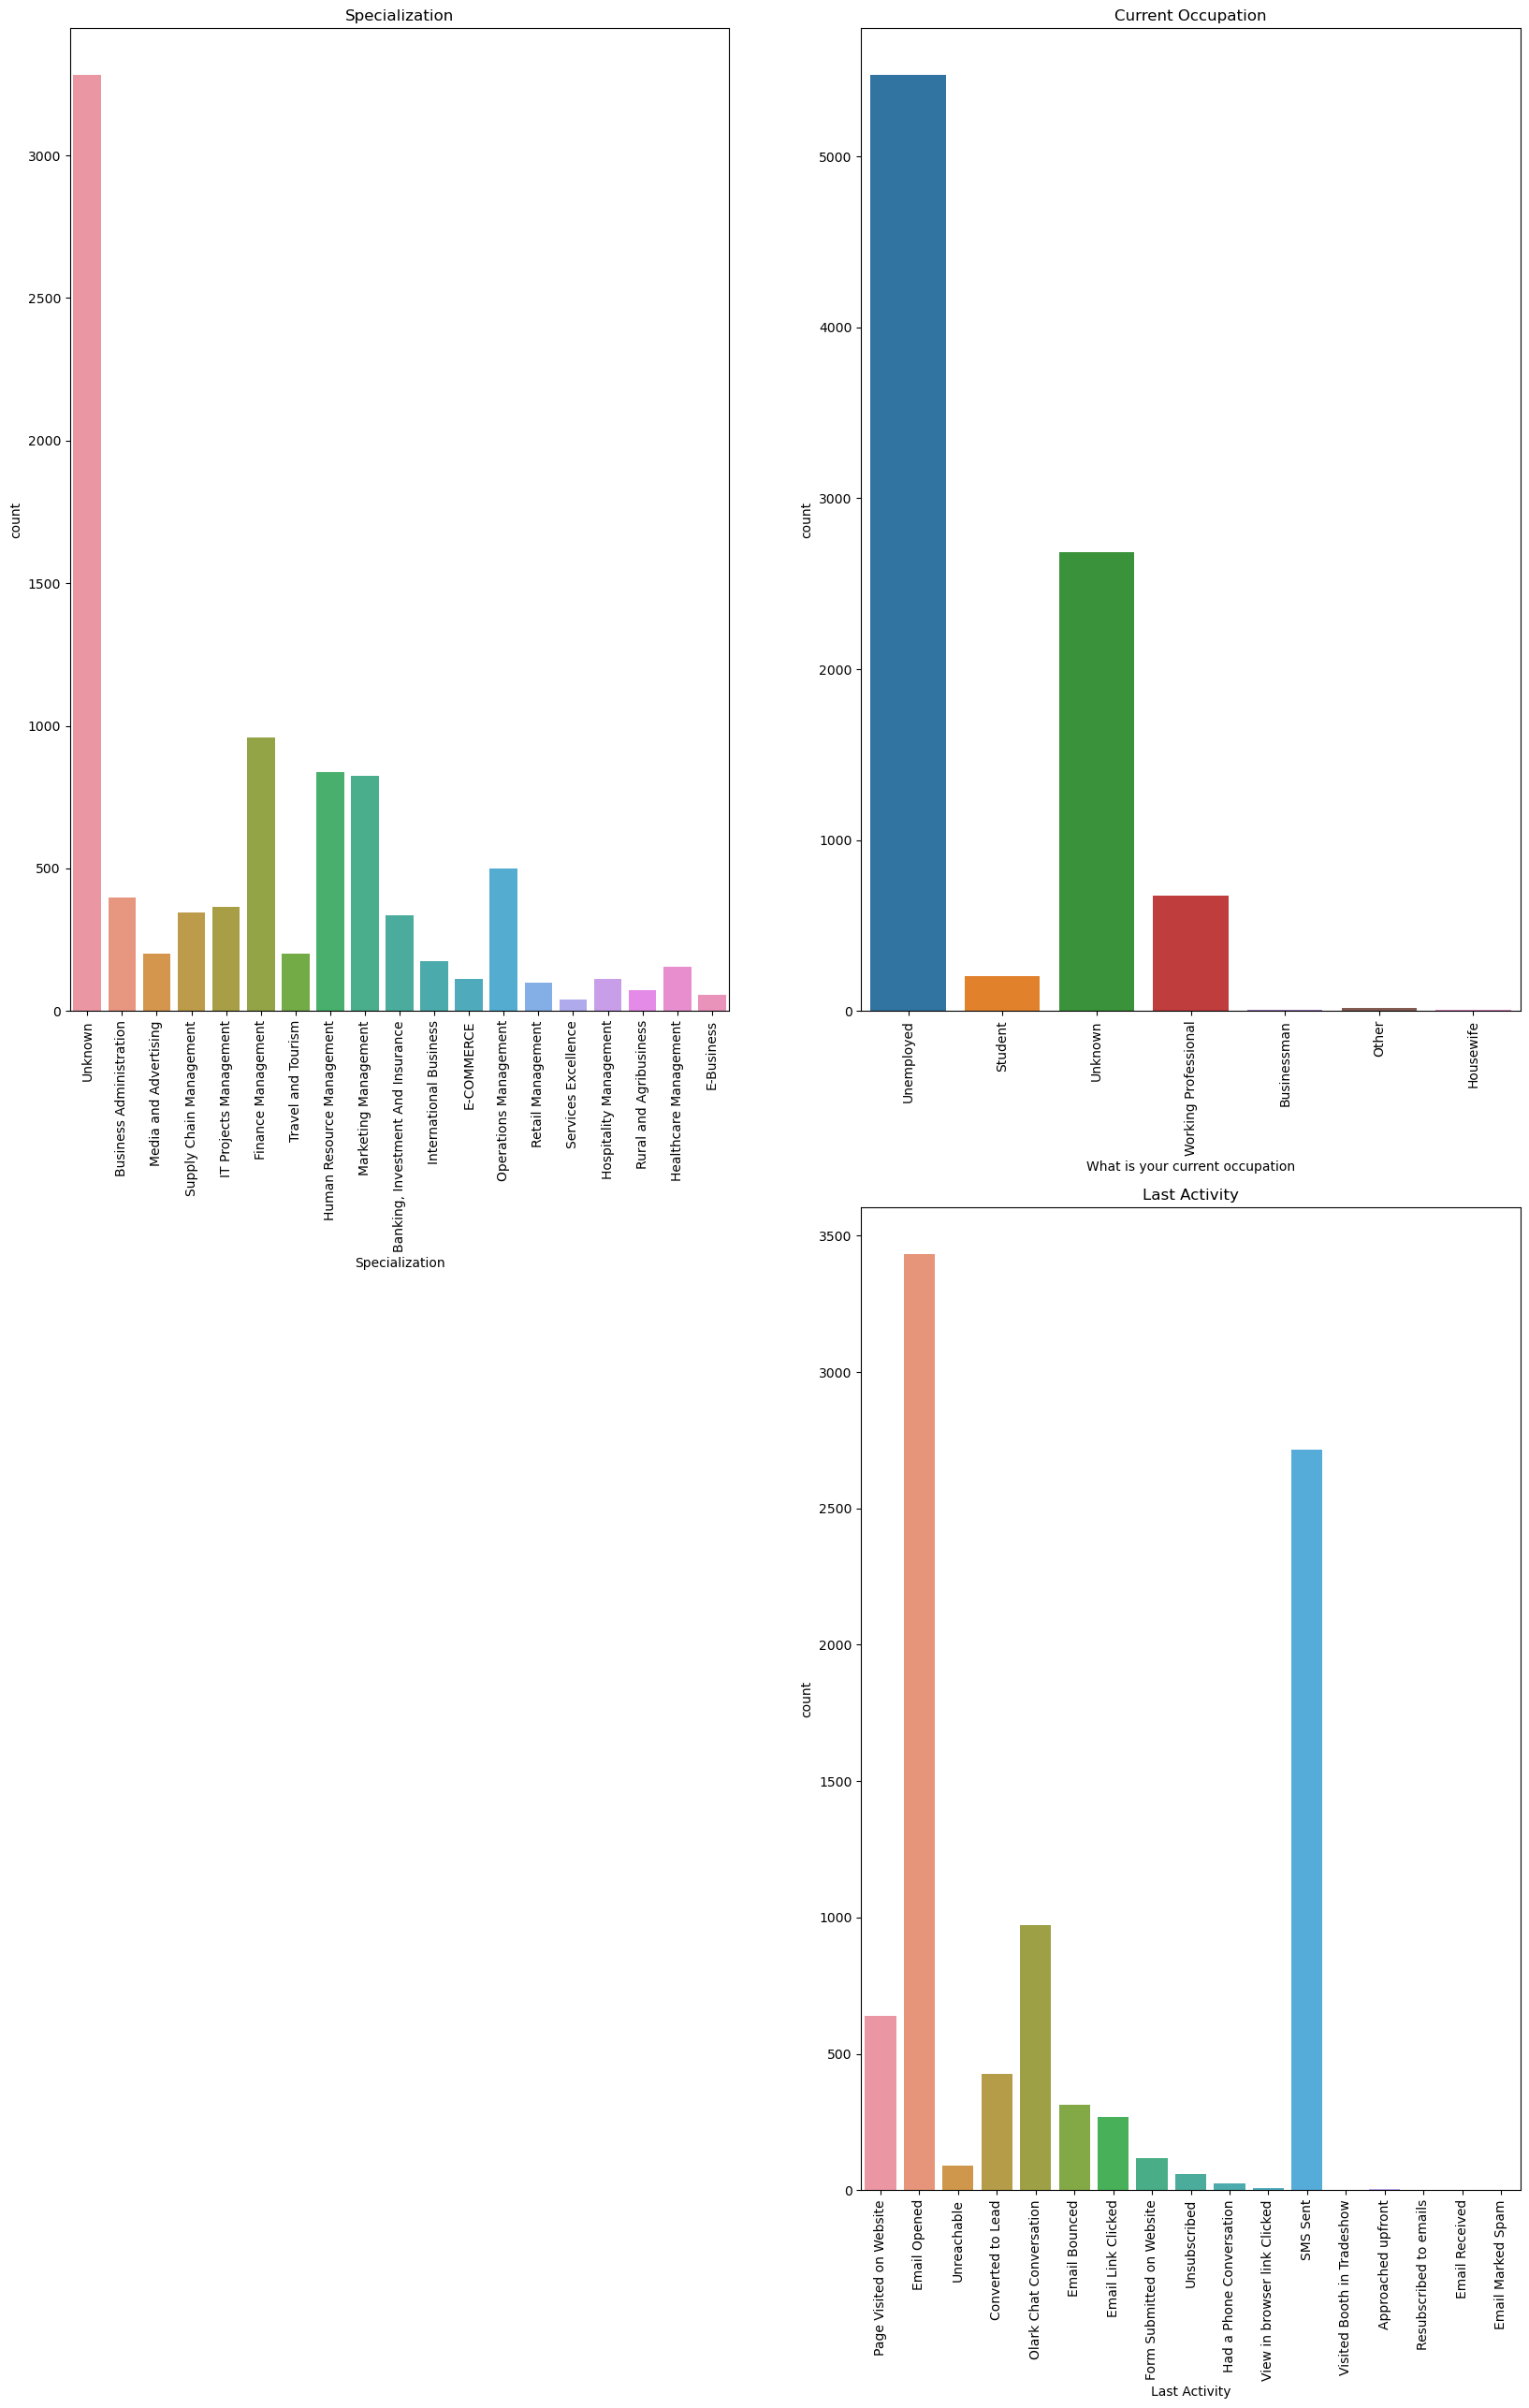

In [26]:
# Convert relevant columns to string type
for column in ['Specialization', 'What is your current occupation', 'Last Activity']:
    d4[column] = d4[column].astype(str)

# Plotting count plot for each column
plt.figure(figsize=(20, 30))

plt.subplot(2, 2, 1)
sns.countplot(data=d4, x='Specialization').tick_params(axis='x', rotation=90)
plt.title('Specialization')

plt.subplot(2, 2, 2)
sns.countplot(data=d4, x='What is your current occupation').tick_params(axis='x', rotation=90)
plt.title('Current Occupation')

plt.subplot(2, 2, 4)
sns.countplot(data=d4, x='Last Activity').tick_params(axis='x', rotation=90)
plt.title('Last Activity')

plt.show()


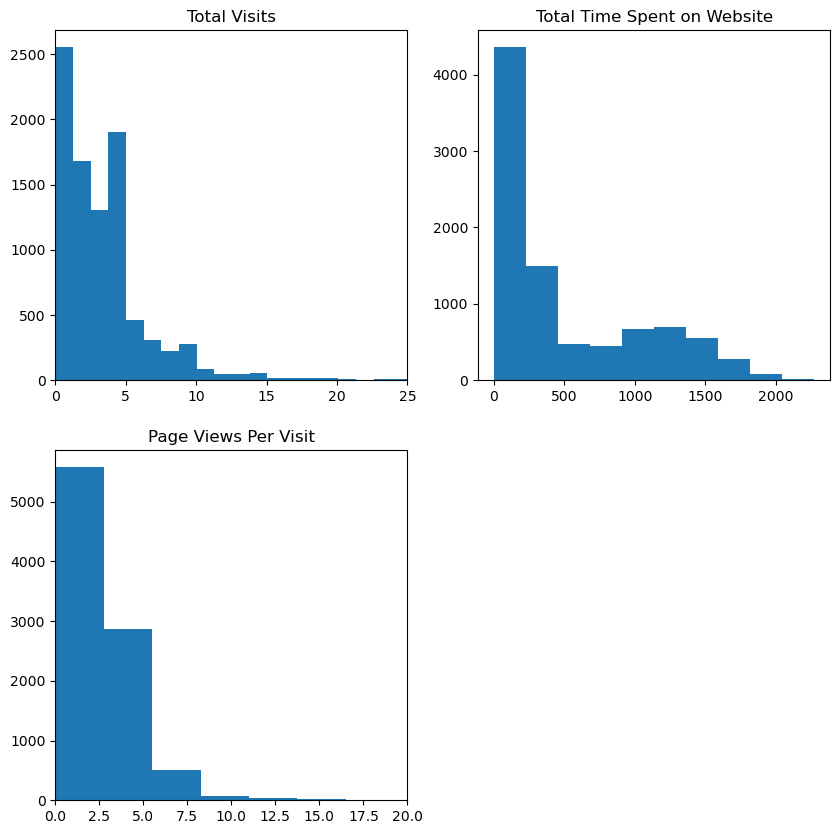

In [27]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(d4['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(d4['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(d4['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

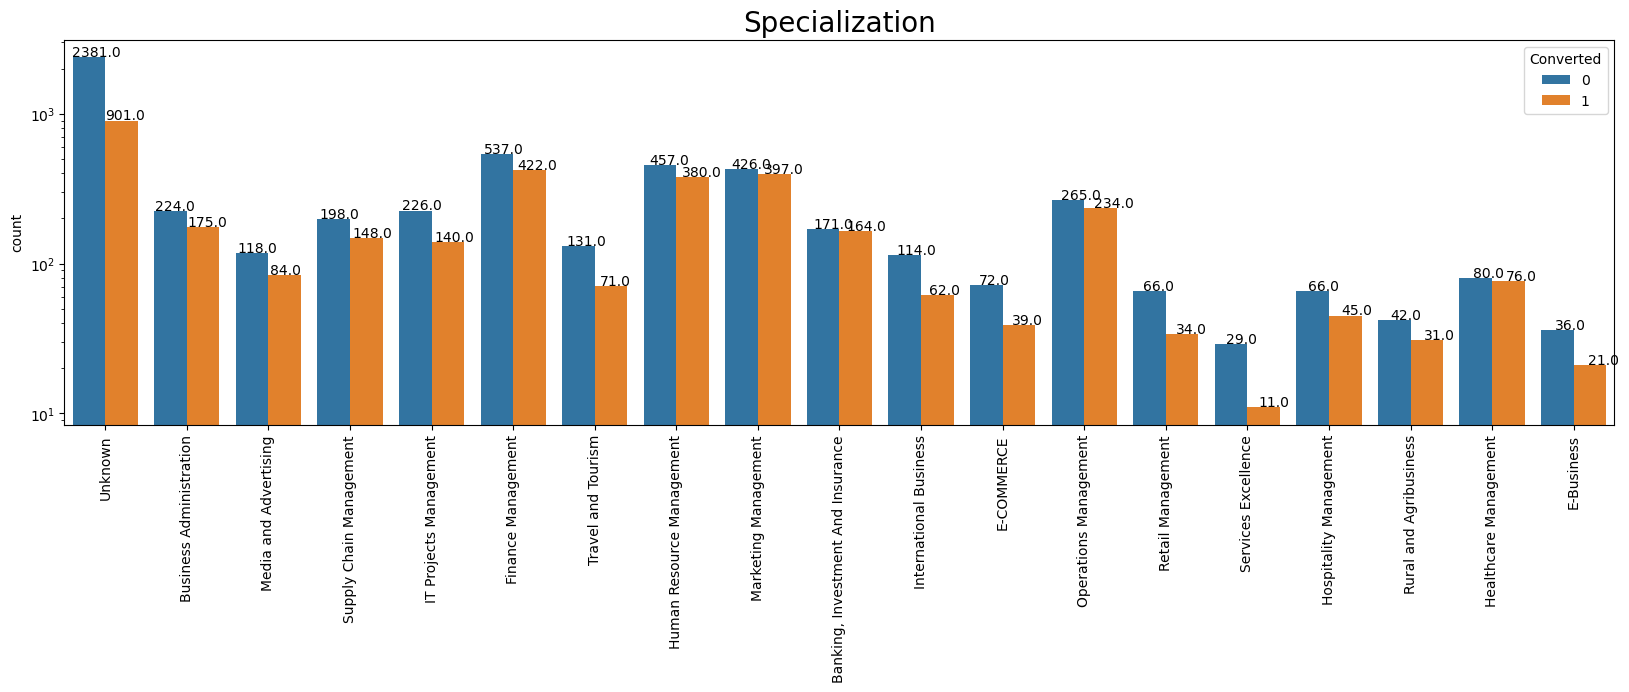

In [28]:
# Plotting count plot of 'Specialization' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Specialization", hue = "Converted", data = d4)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Specialization',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

Observation
We can observe from above count plot of 'Specialization' that 'Management' specialization altogether having more number of leads generating.And Other category is also generating more number of leads.

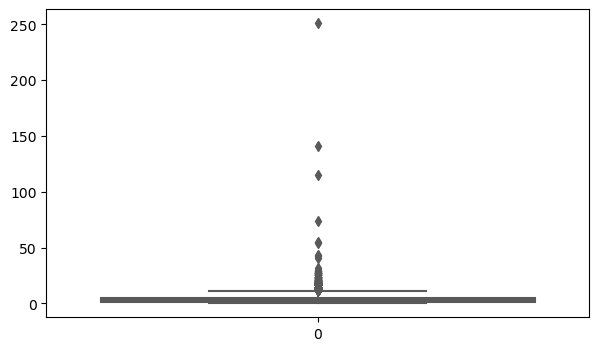

In [29]:
# Plotting box plots to visualize data distribution of 'TotalVisits':-

plt.figure(figsize = (7,4))
sns.boxplot(d4['TotalVisits'],orient='v',palette='Set2')

plt.show()

We can see from above box plot that only upper range outliers are present in data, so need to treat outliers.

In [30]:
# Treating outliers by capping upper range to 0.99:-

Q3 = d4.TotalVisits.quantile(0.99)

d4 = d4[(d4.TotalVisits <= Q3)]

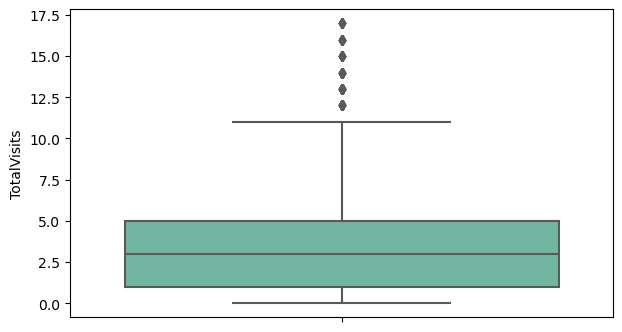

In [31]:
# Verifying outliers after removing it :-

plt.figure(figsize = (7,4))
sns.boxplot(y=d4['TotalVisits'],palette='Set2')
plt.show()

<Axes: >

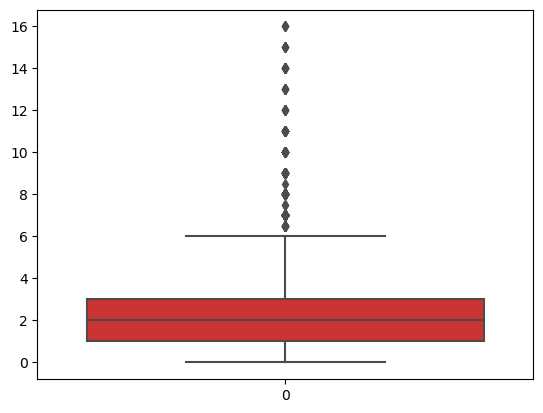

In [32]:

sns.boxplot(d4['Page Views Per Visit'],orient='vert',palette='Set1')


In [33]:
#As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

percentiles = d4['Page Views Per Visit'].quantile([0.05,0.95]).values
d4['Page Views Per Visit'][d4['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
d4['Page Views Per Visit'][d4['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: >

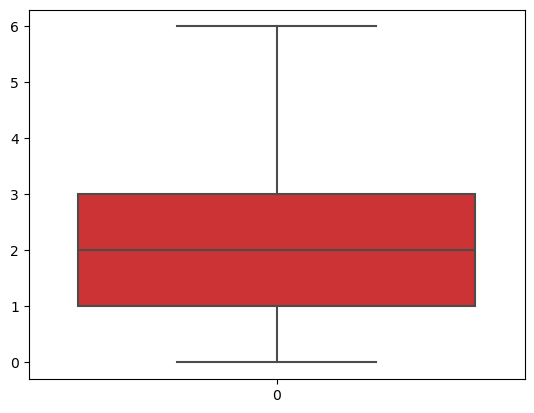

In [34]:
# Visualizing again
sns.boxplot(d4['Page Views Per Visit'],palette='Set1',orient='vert')

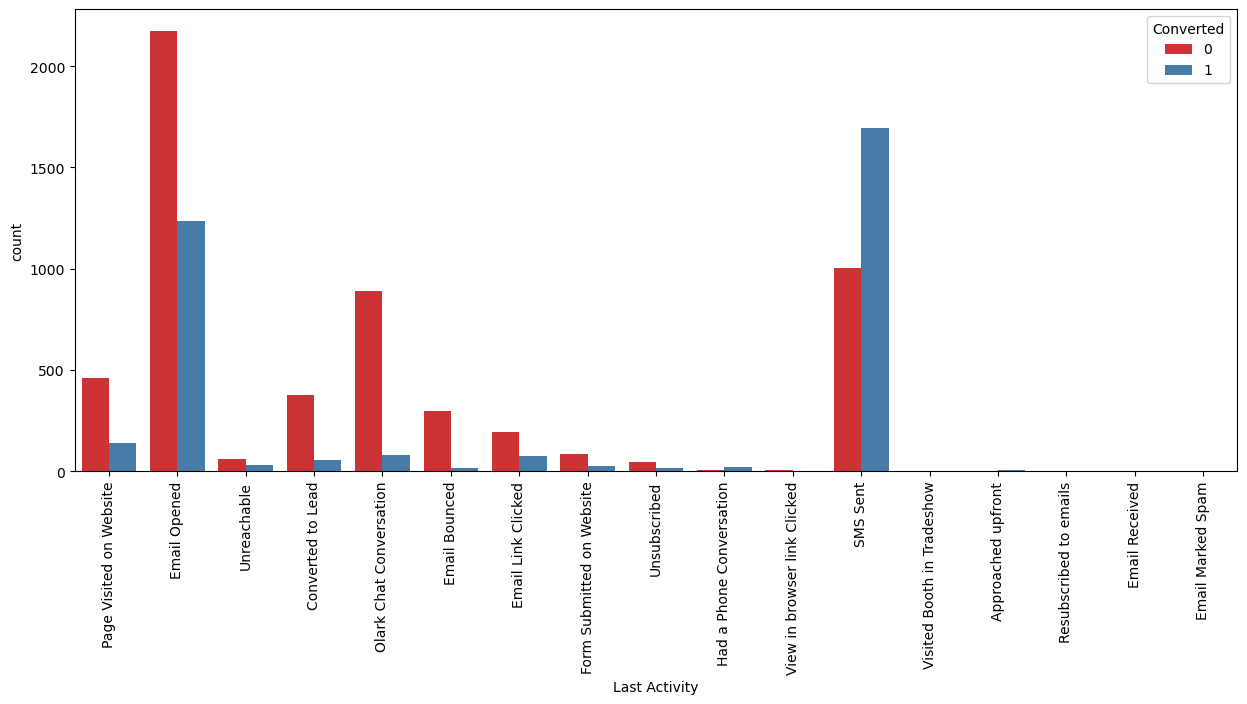

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = d4,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [36]:
# We can club the last activities to "Other_Activity" which are having less data.
d4['Last Activity'] = d4['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

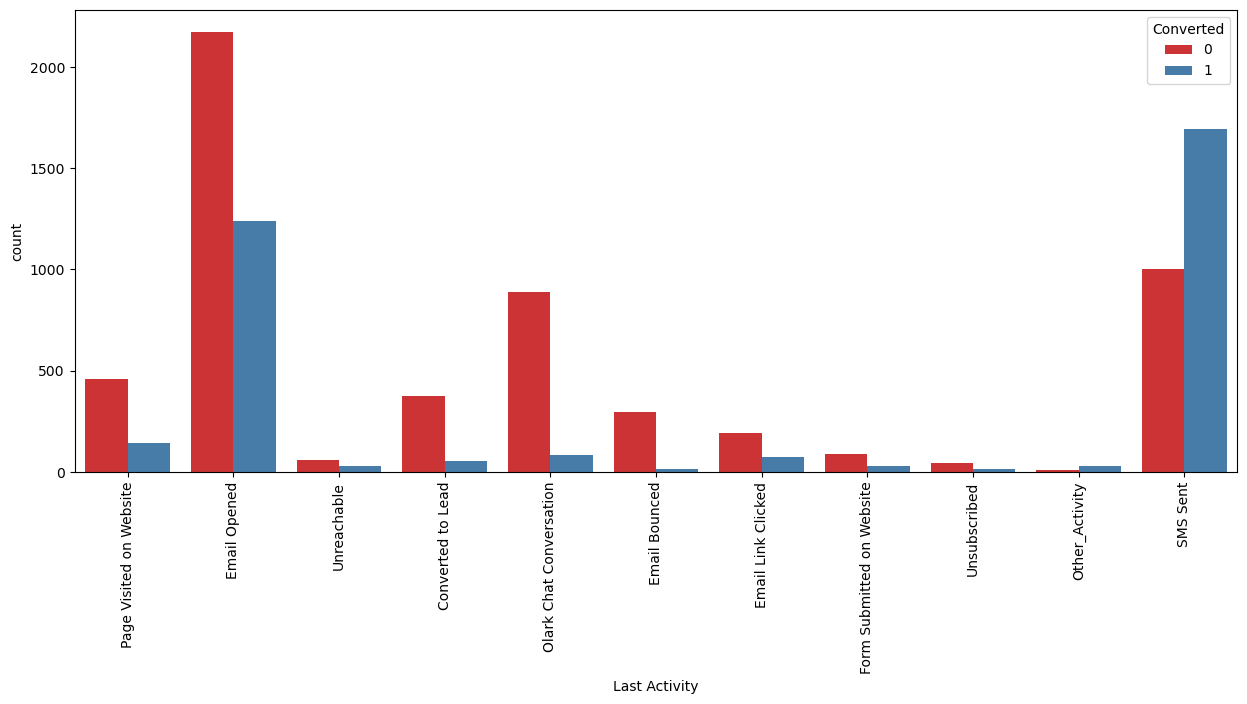

In [37]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = d4,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

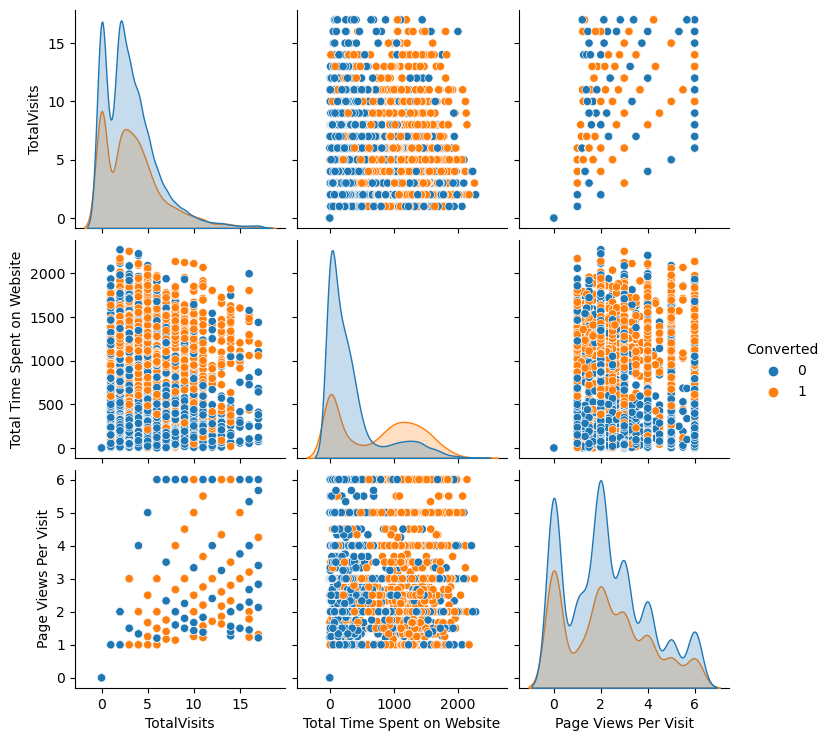

In [38]:
sns.pairplot(d4,diag_kind='kde',hue='Converted')
plt.show()

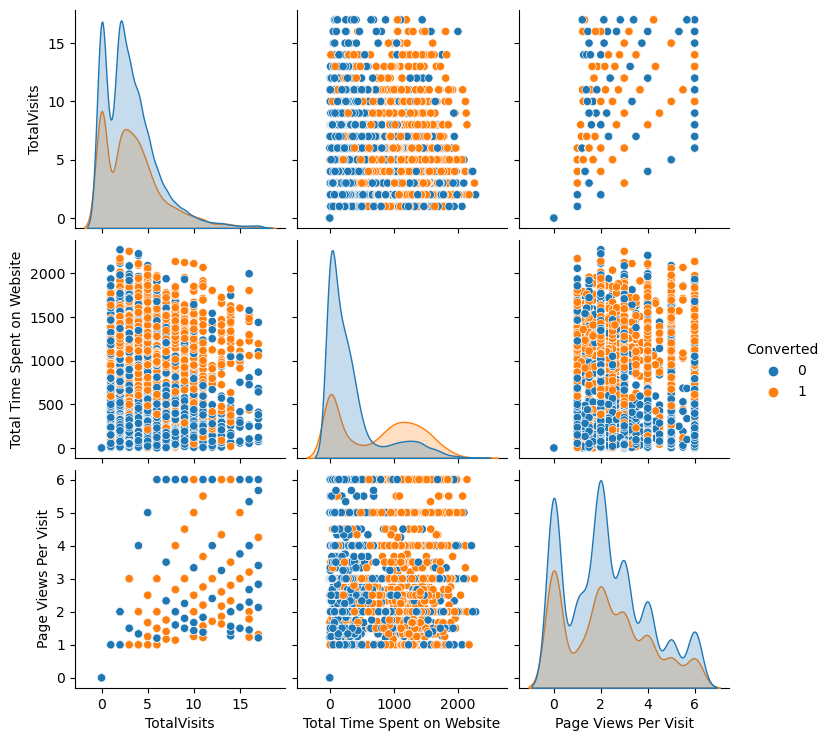

In [39]:
xedu = d4[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(d4,diag_kind='kde',hue='Converted')
plt.show()

In [40]:
#Converting some binary variables (Yes/No) to 0/1

var =  ['Do Not Email','A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

d4[var] = d4[var].apply(binary_map)

In [41]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8991 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8991 non-null   object 
 1   Lead Source                             8991 non-null   object 
 2   Do Not Email                            8991 non-null   int64  
 3   Converted                               8991 non-null   object 
 4   TotalVisits                             8991 non-null   float64
 5   Total Time Spent on Website             8991 non-null   int64  
 6   Page Views Per Visit                    8991 non-null   float64
 7   Last Activity                           8991 non-null   object 
 8   Specialization                          8991 non-null   object 
 9   What is your current occupation         8991 non-null   object 
 10  A free copy of Mastering The Interview  8991 non-null   int64  
 

In [42]:
d4.shape

(8991, 12)

Creating Dummy variables

In [43]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(d4[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
d4 = pd.concat([d4, dummy], axis=1)

In [44]:
d4 = d4.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity'], axis = 1)

In [45]:
d4.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,Unknown,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.5,Unknown,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,Business Administration,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,Media and Advertising,True,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.0,Unknown,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [46]:
# Import the required library
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.preprocessing import LabelEncoder
y_train = np.random.choice([0, 1], 100)

# Encode non-numeric columns
label_encoders = {}
for column in d4.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    d4[column] = le.fit_transform(d4[column])
    label_encoders[column] = le

# Check and handle missing values if necessary
d4= d4.fillna(d4.mean())


In [48]:
# Putting the target variable in y
X = d4.drop(['Converted'] ,axis = 1)
y = d4['Converted']

In [49]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [50]:
# Check the shapes of X_train and y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (6293, 58)
y_train shape: (6293,)


In [51]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0.117647,0.057218,0.166667,1,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3267,0.000000,0.000000,0.000000,18,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5653,0.117647,0.404049,0.333333,10,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5072,0.000000,0.000000,0.000000,18,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3704,0.235294,0.043134,0.666667,16,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


Model Building

In [52]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Import RFE
from sklearn.feature_selection import RFE

In [53]:
# Running RFE with 15 variables as output
# Running RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [54]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Specialization', False, 35),
 ('Lead Origin_Landing Page Submission', False, 32),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Live Chat', False, 36),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark Chat', False, 15),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 27),
 ('Lead Source_Press_Release', False, 23),
 ('Lead Source_Reference', False, 14),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_WeLearn', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 30),
 ('Lead Source_blog', False, 28),
 ('Lead Source_google', False, 17),
 ('Lead Source_testone', False, 29),
 ('Lead Source_wele

In [55]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [56]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [57]:
# Importing statsmodels
import statsmodels.api as sm

In [58]:
X_train_sm = sm.add_constant(X_train)
# Convert boolean values to integers in X_train_sm
X_train_sm_int = X_train_sm.astype(int)

# Fit the model again
logm1 = sm.GLM(y_train, X_train_sm_int, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3039.6
Date:                Tue, 28 May 2024   Deviance:                       6079.3
Time:                        11:00:46   Pearson chi2:                 6.54e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3023
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5049      0.078    -19.413      0.000      -1.657      -1.353
TotalVisits                                             -0.9349      1.117     -0.837      0.403      -3.124       1.254
Total Time Spent on Website                            -22.7818   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Page Views Per Visit                                    -0.1351      0.128     -1.055      0.291      -0.386       0.116
Lead Origin_Lead Add Form                                2.4066      0.245      9.822      0.000       1.926       2.887
Lead Source_Direct Traffic                              -0.4225      0.073     -5.795      0.000      -0.565      -0.280
Lead Source_Organic Search                              -0.1940      0.099     -1.962      0.050      -0.388      -0.000
Lead Source_Welingak Website                             2.2628      1.037      2.181      0.029       0.230       4.296
Last Activity_Email Opened                               1.1010      0.085     12.923      0.000       0.934       1.268
Last Activity_Other_Activity                             2.2565      0.537      4.203      0.000       1.204       3.309
Last Activity_SMS Sent                                   2.1432      0.089     24.165      0.000       1.969       2.317
What is your current occupation_Housewife               22.3782    1.8e+04      0.001      0.999   -3.52e+04    3.53e+04
What is your current occupation_Unknown                 -1.2117      0.079    -15.318      0.000      -1.367      -1.057
What is your current occupation_Working Professional     2.6144      0.178     14.702      0.000       2.266       2.963
Last Notable Activity_Had a Phone Conversation          21.4762   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
Last Notable Activity_Unreachable                        2.2299      0.641      3.481      0.000       0.974       3.486
========================================================================================================================
"""

In [59]:
non_numeric_columns = X_train.select_dtypes(exclude=['float', 'int']).columns
print(non_numeric_columns)


Index(['Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Organic Search', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Unknown',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')


In [60]:
X_train_encoded = pd.get_dummies(X_train, columns=non_numeric_columns, drop_first=True)


In [61]:
# Check for missing values
missing_values = X_train.isnull().sum()

# Check for infinite values
infinite_values = X_train.replace([np.inf, -np.inf], np.nan).isnull().sum()

print("Missing values in X_train:")
print(missing_values)
print("\nInfinite values in X_train:")
print(infinite_values)

Missing values in X_train:
TotalVisits                                             0
Total Time Spent on Website                             0
Page Views Per Visit                                    0
Lead Origin_Lead Add Form                               0
Lead Source_Direct Traffic                              0
Lead Source_Organic Search                              0
Lead Source_Welingak Website                            0
Last Activity_Email Opened                              0
Last Activity_Other_Activity                            0
Last Activity_SMS Sent                                  0
What is your current occupation_Housewife               0
What is your current occupation_Unknown                 0
What is your current occupation_Working Professional    0
Last Notable Activity_Had a Phone Conversation          0
Last Notable Activity_Unreachable                       0
dtype: int64

Infinite values in X_train:
TotalVisits                                             0
Tot

In [62]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
    return vif_data

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for X_train
vif_data = calculate_vif(X_train)
vif_data = vif_data.sort_values(by="VIF", ascending=False)
vif_data

,Feature,VIF
2,Page Views Per Visit,6.160954
0,TotalVisits,4.765583
1,Total Time Spent on Website,2.163903
9,Last Activity_SMS Sent,1.844097
7,Last Activity_Email Opened,1.830885
3,Lead Origin_Lead Add Form,1.621208
4,Lead Source_Direct Traffic,1.546379
8,Last Activity_Other_Activity,1.456077
13,Last Notable Activity_Had a Phone Conversation,1.446138
5,Lead Source_Organic Search,1.410238


In [64]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [65]:
# Refit the model with the new set of features
X_train_sm = X_train_sm.astype(int)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3039.6
Date:                Tue, 28 May 2024   Deviance:                       6079.3
Time:                        11:00:47   Pearson chi2:                 6.54e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3023
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5049      0.078    -19.413      0.000      -1.657      -1.353
TotalVisits                                             -0.9349      1.117     -0.837      0.403      -3.124       1.254
Total Time Spent on Website                            -22.7818   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Page Views Per Visit                                    -0.1351      0.128     -1.055      0.291      -0.386       0.116
Lead Origin_Lead Add Form                                2.4066      0.245      9.822      0.000       1.926       2.887
Lead Source_Direct Traffic                              -0.4225      0.073     -5.795      0.000      -0.565      -0.280
Lead Source_Organic Search                              -0.1940      0.099     -1.962      0.050      -0.388      -0.000
Lead Source_Welingak Website                             2.2628      1.037      2.181      0.029       0.230       4.296
Last Activity_Email Opened                               1.1010      0.085     12.923      0.000       0.934       1.268
Last Activity_Other_Activity                             2.2565      0.537      4.203      0.000       1.204       3.309
Last Activity_SMS Sent                                   2.1432      0.089     24.165      0.000       1.969       2.317
What is your current occupation_Housewife               22.3782    1.8e+04      0.001      0.999   -3.52e+04    3.53e+04
What is your current occupation_Unknown                 -1.2117      0.079    -15.318      0.000      -1.367      -1.057
What is your current occupation_Working Professional     2.6144      0.178     14.702      0.000       2.266       2.963
Last Notable Activity_Had a Phone Conversation          21.4762   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
Last Notable Activity_Unreachable                        2.2299      0.641      3.481      0.000       0.974       3.486
========================================================================================================================
"""

In [66]:
# Calculate VIF for X_train
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
    return vif_data
vif_data = calculate_vif(X_train)
vif_data = vif_data.sort_values(by="VIF", ascending=False)
vif_data

,Feature,VIF
0,TotalVisits,2.563930
1,Total Time Spent on Website,2.103751
8,Last Activity_SMS Sent,1.715460
6,Last Activity_Email Opened,1.714793
2,Lead Origin_Lead Add Form,1.601985
3,Lead Source_Direct Traffic,1.497147
7,Last Activity_Other_Activity,1.455112
12,Last Notable Activity_Had a Phone Conversation,1.446056
4,Lead Source_Organic Search,1.350336
5,Lead Source_Welingak Website,1.344502


In [67]:
X_train.drop(['What is your current occupation_Housewife', 'Last Notable Activity_Had a Phone Conversation'], axis=1, inplace=True)

In [68]:
# Refit the model with the new set of features
X_train_sm = X_train_sm.astype(int)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3039.6
Date:                Tue, 28 May 2024   Deviance:                       6079.3
Time:                        11:00:47   Pearson chi2:                 6.54e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3023
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5049      0.078    -19.413      0.000      -1.657      -1.353
TotalVisits                                             -0.9349      1.117     -0.837      0.403      -3.124       1.254
Total Time Spent on Website                            -22.7818   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Page Views Per Visit                                    -0.1351      0.128     -1.055      0.291      -0.386       0.116
Lead Origin_Lead Add Form                                2.4066      0.245      9.822      0.000       1.926       2.887
Lead Source_Direct Traffic                              -0.4225      0.073     -5.795      0.000      -0.565      -0.280
Lead Source_Organic Search                              -0.1940      0.099     -1.962      0.050      -0.388      -0.000
Lead Source_Welingak Website                             2.2628      1.037      2.181      0.029       0.230       4.296
Last Activity_Email Opened                               1.1010      0.085     12.923      0.000       0.934       1.268
Last Activity_Other_Activity                             2.2565      0.537      4.203      0.000       1.204       3.309
Last Activity_SMS Sent                                   2.1432      0.089     24.165      0.000       1.969       2.317
What is your current occupation_Housewife               22.3782    1.8e+04      0.001      0.999   -3.52e+04    3.53e+04
What is your current occupation_Unknown                 -1.2117      0.079    -15.318      0.000      -1.367      -1.057
What is your current occupation_Working Professional     2.6144      0.178     14.702      0.000       2.266       2.963
Last Notable Activity_Had a Phone Conversation          21.4762   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
Last Notable Activity_Unreachable                        2.2299      0.641      3.481      0.000       0.974       3.486
========================================================================================================================
"""

In [69]:
# Calculate VIF for X_train
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
    return vif_data
vif_data = calculate_vif(X_train)
vif_data = vif_data.sort_values(by="VIF", ascending=False)
vif_data

,Feature,VIF
0,TotalVisits,2.563574
1,Total Time Spent on Website,2.102586
8,Last Activity_SMS Sent,1.715067
6,Last Activity_Email Opened,1.713914
2,Lead Origin_Lead Add Form,1.593998
3,Lead Source_Direct Traffic,1.497108
4,Lead Source_Organic Search,1.349490
5,Lead Source_Welingak Website,1.342623
9,What is your current occupation_Unknown,1.217401
10,What is your current occupation_Working Profes...,1.193864


Making Prediction on the Train set


In [70]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3523    0.181690
3267    0.995071
5653    0.304399
5072    0.165804
3704    0.400370
1790    0.360431
2482    0.400370
1694    0.360431
8768    0.400370
9225    0.127033
dtype: float64

In [71]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18169026, 0.99507067, 0.30439863, 0.16580354, 0.40036986,
       0.36043128, 0.40036986, 0.36043128, 0.40036986, 0.12703288])

In [72]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.181690
1,1,0.995071
2,1,0.304399
3,0,0.165804
4,0,0.400370


In [73]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.181690,0
1,1,0.995071,1
2,1,0.304399,0
3,0,0.165804,0
4,0,0.400370,0


 Model Evaluation

In [74]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [75]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3384,  531],
       [ 994, 1384]], dtype=int64)

In [76]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7576672493246465

In [77]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [78]:
# Calculating the sensitivity
TP/(TP+FN)

0.5820016820857864

In [79]:
# Calculating the specificity
TN/(TN+FP)

0.864367816091954

In [80]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

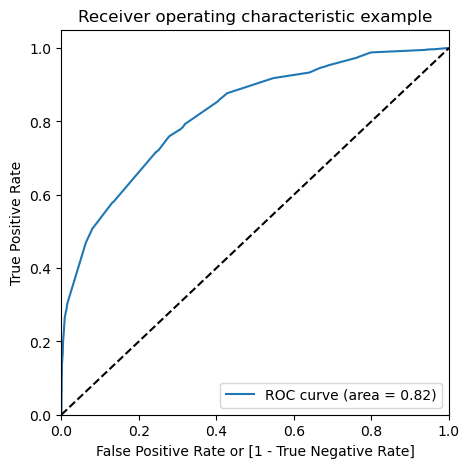

In [82]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [83]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.181690,0,1,1,0,0,0,0,0,0,0,0
1,1,0.995071,1,1,1,1,1,1,1,1,1,1,1
2,1,0.304399,0,1,1,1,1,0,0,0,0,0,0
3,0,0.165804,0,1,1,0,0,0,0,0,0,0,0
4,0,0.400370,0,1,1,1,1,1,0,0,0,0,0


In [84]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.497378,0.988225,0.199234
0.2,0.2,0.687907,0.876367,0.573436
0.3,0.3,0.695058,0.851976,0.599745
0.4,0.4,0.741141,0.715728,0.756577
0.5,0.5,0.757667,0.582002,0.864368
0.6,0.6,0.763865,0.505046,0.921073
0.7,0.7,0.725568,0.296888,0.985951
0.8,0.8,0.720801,0.279647,0.988761
0.9,0.9,0.702050,0.221194,0.994125


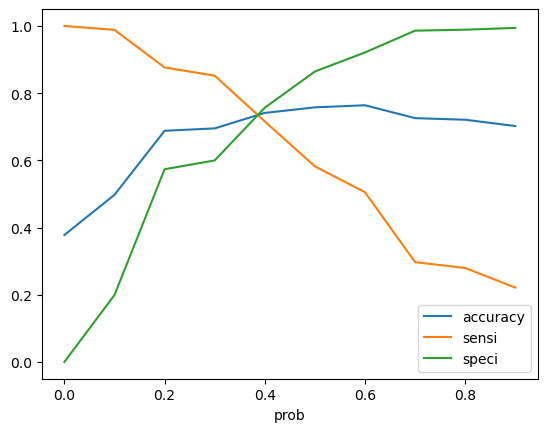

In [85]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

optimal cut off is at 0.38.

In [86]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.181690,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.995071,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.304399,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.165804,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.400370,0,1,1,1,1,1,0,0,0,0,0,1


In [87]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7263626251390434

In [88]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2724, 1191],
       [ 531, 1847]], dtype=int64)

In [89]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [90]:
# Calculating the sensitivity
TP/(TP+FN)

0.7767031118587048

In [91]:
# Calculating the specificity
TN/(TN+FP)

0.6957854406130268

 Prediction on Test set

In [108]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [109]:
# Substituting all the columns in the final train model
col = X_train.columns
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Page Views Per Visit,Total Time Spent on Website,Last Activity
83,1.0,1.085811,-5.676088,-7.406865,Email Link Clicked
53,1.0,-5.516833,-0.850739,1.001295,Olark Chat Conversation
70,1.0,4.261591,-2.058434,3.617534,Email Link Clicked
45,1.0,0.841642,0.277818,-3.030038,Page Visited on Website
44,1.0,0.798352,1.584947,0.637680,Olark Chat Conversation
39,1.0,0.966693,-3.203462,-0.849476,Email Link Clicked
22,1.0,-1.497340,3.500047,-4.430787,Email Bounced
80,1.0,-3.102032,-6.611328,-4.208091,Olark Chat Conversation
10,1.0,2.195739,-3.002778,3.764378,Form Submitted on Website
0,1.0,NaN,-0.055298,-3.993429,Email Bounced


In [113]:
# Check the shape of X_test and X_train
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)



Shape of X_train: (80, 4)
Shape of X_test: (20, 4)


In [118]:
# Check the shape of X_test_sm and the parameters (res.params)
print("Shape of X_test_sm:", X_test_sm.shape)
print("Shape of parameters (res.params):", res.params.shape)

Shape of X_test_sm: (20, 4)
Shape of parameters (res.params): (16,)


In [ ]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

In [ ]:
# Make predictions on the test set using 0.38 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [ ]:
# Check y_pred_final

y_pred_final.head()

In [ ]:
print("Number of missing values in y_true:", y_pred_final['Converted'].isnull().sum())


In [ ]:
# Remove rows with missing true labels
y_pred_final.dropna(subset=['Converted'], inplace=True)


In [ ]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

In [ ]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

In [ ]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [ ]:
# Calculating the sensitivity
TP/(TP+FN)

In [ ]:
# Calculating the specificity
TN/(TN+FP)

In [ ]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

In [ ]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

In [ ]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

In [ ]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

In [ ]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

In [ ]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [ ]:
# Precision = TP / TP + FP
TP / (TP + FP)

In [ ]:
#Recall = TP / TP + FN
TP / (TP + FN)

Prediction on Test set

In [ ]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

In [ ]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

In [ ]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

In [ ]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

In [ ]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [ ]:
# Precision = TP / TP + FP
TP / (TP + FP)

In [ ]:
#Recall = TP / TP + FN
TP / (TP + FN)

With the current cut off as 0.41 we have Precision around 72% and Recall around 78%

Conclusion:
Based on the analysis, we can conclude that the key factors influencing potential buyers' decisions include their engagement with the X Education website, such as the total time spent and the number of visits. Additionally, leads sourced from Google, Direct traffic, Organic search, and the Welingak website show significant potential. The last activity, particularly interactions via SMS and Olark chat conversations, also play a crucial role. Moreover, leads originating from Lead add format and those who are working professionals exhibit a higher likelihood of conversion.

In summary, by focusing on nurturing leads through personalized communication, providing tailored information about relevant courses and services, and closely monitoring and engaging with potential buyers, X Education can significantly increase its conversion rates and flourish in the online education market.